<a href="https://colab.research.google.com/github/Divaz2024/proyecto_integrado-2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: Solicita a prompt Gemeni que armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre y apellido aleatorio
def generar_nombre_apellido():
  nombres = ["Juan", "Pedro", "Maria", "Laura", "Carlos", "Ana", "Diego", "Sofia", "Luis", "Valentina"]
  apellidos = ["Gomez", "Perez", "Rodriguez", "Lopez", "Garcia", "Martinez", "Sanchez", "Gonzalez", "Fernandez", "Diaz"]
  return random.choice(nombres) + " " + random.choice(apellidos)

# Función para generar un DNI aleatorio
def generar_dni():
  return random.randint(10000000, 99999999)


# Crear un DataFrame con 100 filas
data = []
for _ in range(100):
  nombre_apellido = generar_nombre_apellido()
  dni = generar_dni()
  materia = random.choice(materias)
  nota_1er_trimestre = round(np.random.uniform(1, 10), 1)
  nota_2do_trimestre = round(np.random.uniform(1, 10), 1)
  nota_3er_trimestre = round(np.random.uniform(1, 10), 1)
  faltas = random.randint(0, 15)
  data.append([nombre_apellido, dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])

df = pd.DataFrame(data, columns=["Nombre y Apellido", "Nro DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

df

,Nombre y Apellido,Nro DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,Pedro Martinez,25409509,Informática,8.7,7.9,3.6,9
1,Diego Sanchez,15992469,Matemática,7.0,9.3,8.8,7
2,Laura Gonzalez,75865376,Física,4.1,5.5,9.9,14
3,Laura Lopez,25396822,Música,8.3,2.7,2.3,14
4,Diego Gonzalez,49173039,Música,4.4,1.3,9.6,11
...,...,...,...,...,...,...,...
95,Laura Fernandez,64909229,Historia,7.4,8.6,8.3,1
96,Valentina Perez,16827973,Química,7.4,8.6,5.8,8
97,Carlos Gomez,88142832,Informática,8.4,7.5,2.0,9
98,Ana Fernandez,68600304,Geografía,8.8,2.6,5.5,3


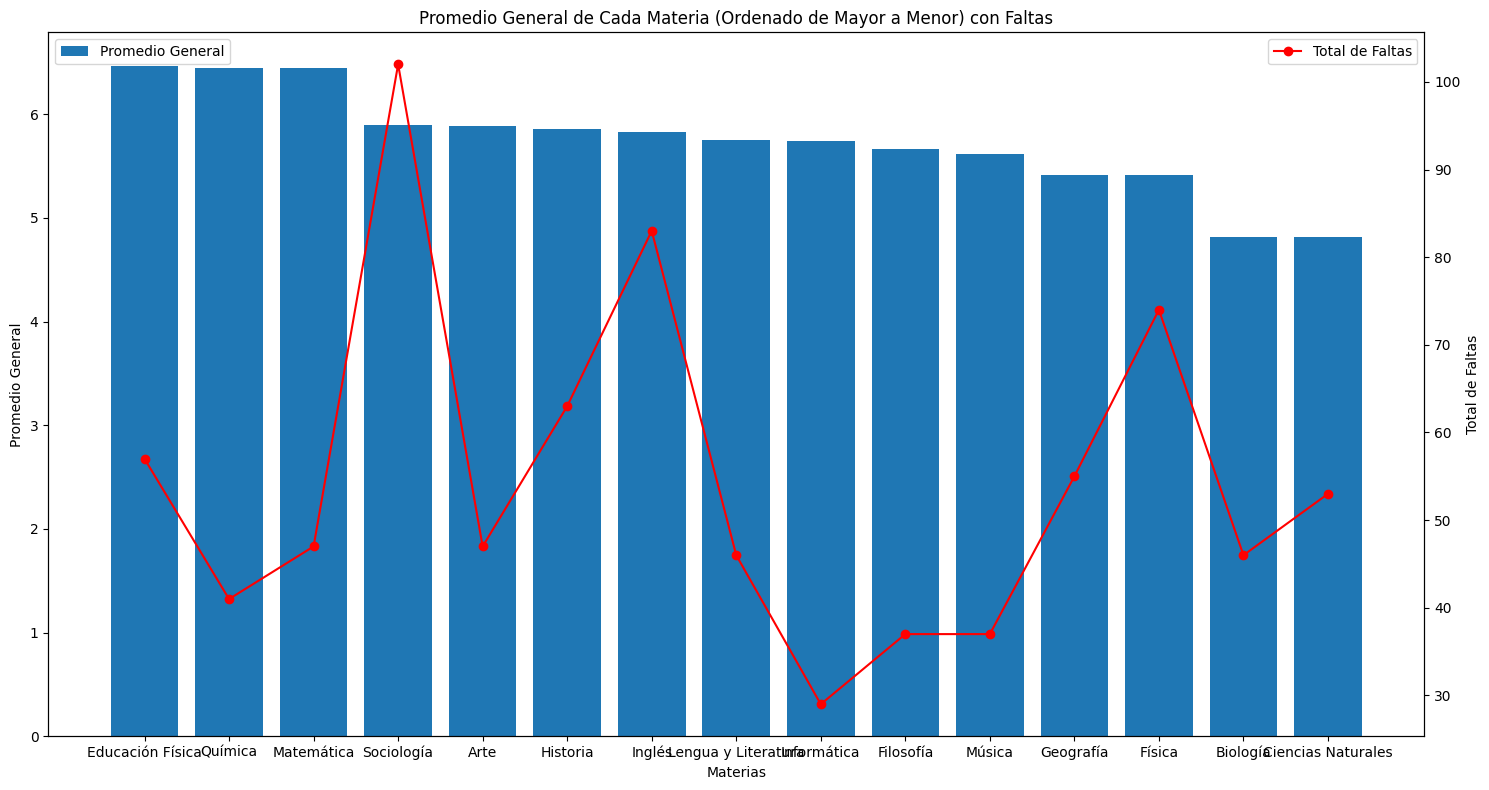

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
promedio_por_materia['Promedio General'] = promedio_por_materia.mean(axis=1)

# Ordenar las materias por promedio general de mayor a menor
promedio_por_materia = promedio_por_materia.sort_values('Promedio General', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
ax1 = plt.gca()  # Obtener el eje actual
ax1.bar(promedio_por_materia.index, promedio_por_materia['Promedio General'])

# Agregar las faltas como valores contrastables en un segundo eje
ax2 = ax1.twinx()
ax2.plot(promedio_por_materia.index, df.groupby('Materia Escolar')['Faltas a Clases'].sum(), color='red', marker='o')


# Configurar el gráfico
plt.title('Promedio General de Cada Materia (Ordenado de Mayor a Menor) con Faltas')
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio General')
ax2.set_ylabel('Total de Faltas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x

# Agregar leyenda
ax1.legend(['Promedio General'], loc='upper left')
ax2.legend(['Total de Faltas'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()